In [3]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Handling imbalance
from imblearn.over_sampling import SMOTE


In [5]:
import pandas as pd

# url = "https://raw.githubusercontent.com/<username>/<repo-name>/main/creditcard.csv"
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Fraud cases: 81
Normal cases: 17836


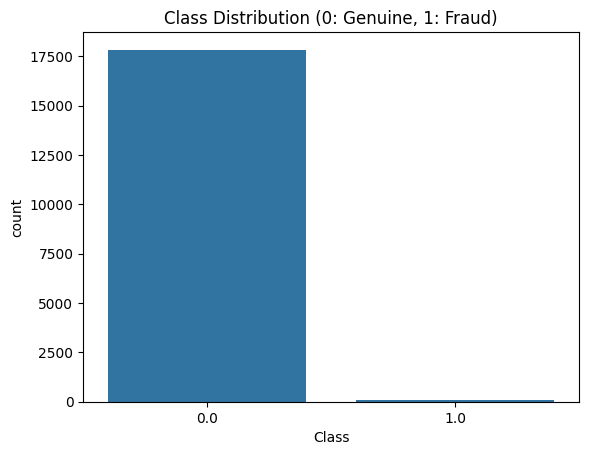

In [6]:
print("Fraud cases:", sum(data['Class']==1))
print("Normal cases:", sum(data['Class']==0))

sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0: Genuine, 1: Fraud)")
plt.show()


In [7]:
# 'Amount' and 'Time' are not scaled; scale them for better model performance
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))


In [9]:
# Drop rows with NaN values in the 'Class' column
data_cleaned = data.dropna(subset=['Class'])

X = data_cleaned.drop('Class', axis=1)
y = data_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", sum(y_train==1))
print("After SMOTE:", sum(y_train_res==1))


Before SMOTE: 65
After SMOTE: 14268


In [11]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res, y_train_res)

y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3568
         1.0       0.26      1.00      0.42        16

    accuracy                           0.99      3584
   macro avg       0.63      0.99      0.70      3584
weighted avg       1.00      0.99      0.99      3584



In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.83      0.94      0.88        16

    accuracy                           1.00      3584
   macro avg       0.92      0.97      0.94      3584
weighted avg       1.00      1.00      1.00      3584



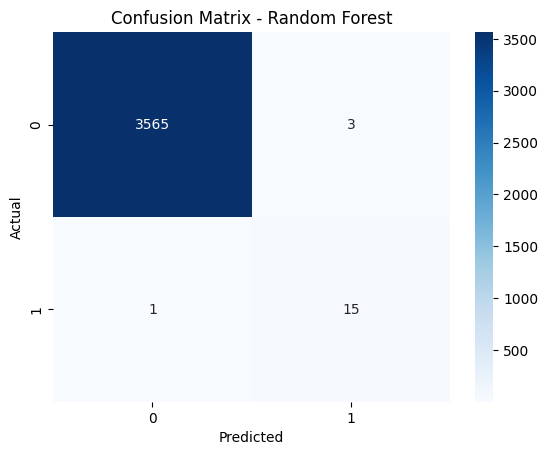

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print("\n")


=== Logistic Regression ===
Accuracy: 0.9874441964285714
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3568
         1.0       0.26      1.00      0.42        16

    accuracy                           0.99      3584
   macro avg       0.63      0.99      0.70      3584
weighted avg       1.00      0.99      0.99      3584



=== Random Forest ===
Accuracy: 0.9988839285714286
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.83      0.94      0.88        16

    accuracy                           1.00      3584
   macro avg       0.92      0.97      0.94      3584
weighted avg       1.00      1.00      1.00      3584



